In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import transforms,v2
import random
from sklearn.model_selection import train_test_split
import shutil
import uuid

In [2]:
root=os.getcwd()
videos_path=os.path.join(root,'oficial_db','recoger','carlos_pacherrez')
video_prueba_path=os.path.join(videos_path,'videos_1.mp4')

In [3]:
def get_frames(video_path,n_frames,transform=None):
        cap = cv2.VideoCapture(video_path)

        video_length=cap.get(cv2.CAP_PROP_FRAME_COUNT)

        #print(f"Length of the video: {video_length}")


        frames=[]

        ret,frame=None,None

        frame_step=int(video_length//n_frames)
        
        #print(f"Frame step: {frame_step}")

        for _ in range(n_frames):
            for _ in range(frame_step):
                ret,frame=cap.read()
            #print(f"Estado del frame: {ret}")
            if ret:
                if transform:
                    frame=transform(frame)
                    #print(f"Dimension of the frame: {frame.shape}")
                    frames.append(frame)
                else:
                    frames.append(frame)

        cap.release()
        video_tensor=torch.stack(frames)

        return video_tensor
        #return frames

In [4]:
class RandomCropVideo:
    def __init__(self, size):
        self.size = size  # (height, width)
        self.params = None

    def get_params(self, h, w):
        th, tw = self.size
        if h == th and w == tw:
            return 0, 0
        i = random.randint(0, h - th)
        j = random.randint(0, w - tw)
        return i, j

    def __call__(self, video):
        # video: [T, C, H, W]
        T, C, H, W = video.shape
        if self.params is None:
            self.params = self.get_params(H, W)
        i, j = self.params
        return video[:, :, i:i+self.size[0], j:j+self.size[1]]

    def reset(self):
        # Call this before processing a new video
        self.params = None

## Códigos de prueba

In [6]:
#original dimension: (1080,1920)

# transform_videos_prueba=transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize((108,192)), #256,480   #216,384   #180,320     #135,240
#     transforms.RandomCrop(100),    #224       #          #120         #96
#     v2.ColorJitter(brightness=(1,1),contrast=(0.5,0.5),saturation=(1,1),hue=(0.0,0.0)),
#     transforms.ToTensor()
# ])

transform_videos_prueba=transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64,64)),
    v2.ColorJitter(saturation=(1,1),
                hue=(0,0),
                brightness=(1,1),
                contrast=(1,1)),
    transforms.ToTensor()
])



In [7]:
#frames=get_frames(video_path=video_prueba_path,n_frames=20,transform=transform_videos_prueba)
frames=get_frames(video_path=video_prueba_path,n_frames=10,transform=transform_videos_prueba)

In [8]:
frames.shape

torch.Size([10, 3, 64, 64])

In [9]:
#crop_instance=RandomCropVideo(size=(128,128))
#frames_cropped=crop_instance(frames)

In [10]:
# n=1
# for frame in frames_cropped:
#     #frame_up = cv2.cvtColor((frame.permute(1, 2, 0).numpy()*255).astype('uint8'), cv2.COLOR_BGR2RGB)
#     #frame_up = cv2.cvtColor((frame.numpy()*255).astype('uint8'), cv2.COLOR_BGR2RGB)
#     frame_up = (frame.permute(1, 2, 0).numpy()*255).astype('uint8')
#     cv2.imwrite(f"frames_cropped/{n}.jpg",frame_up)
#     n+=1

Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)
Dimensions of the frame: (64, 64, 3)


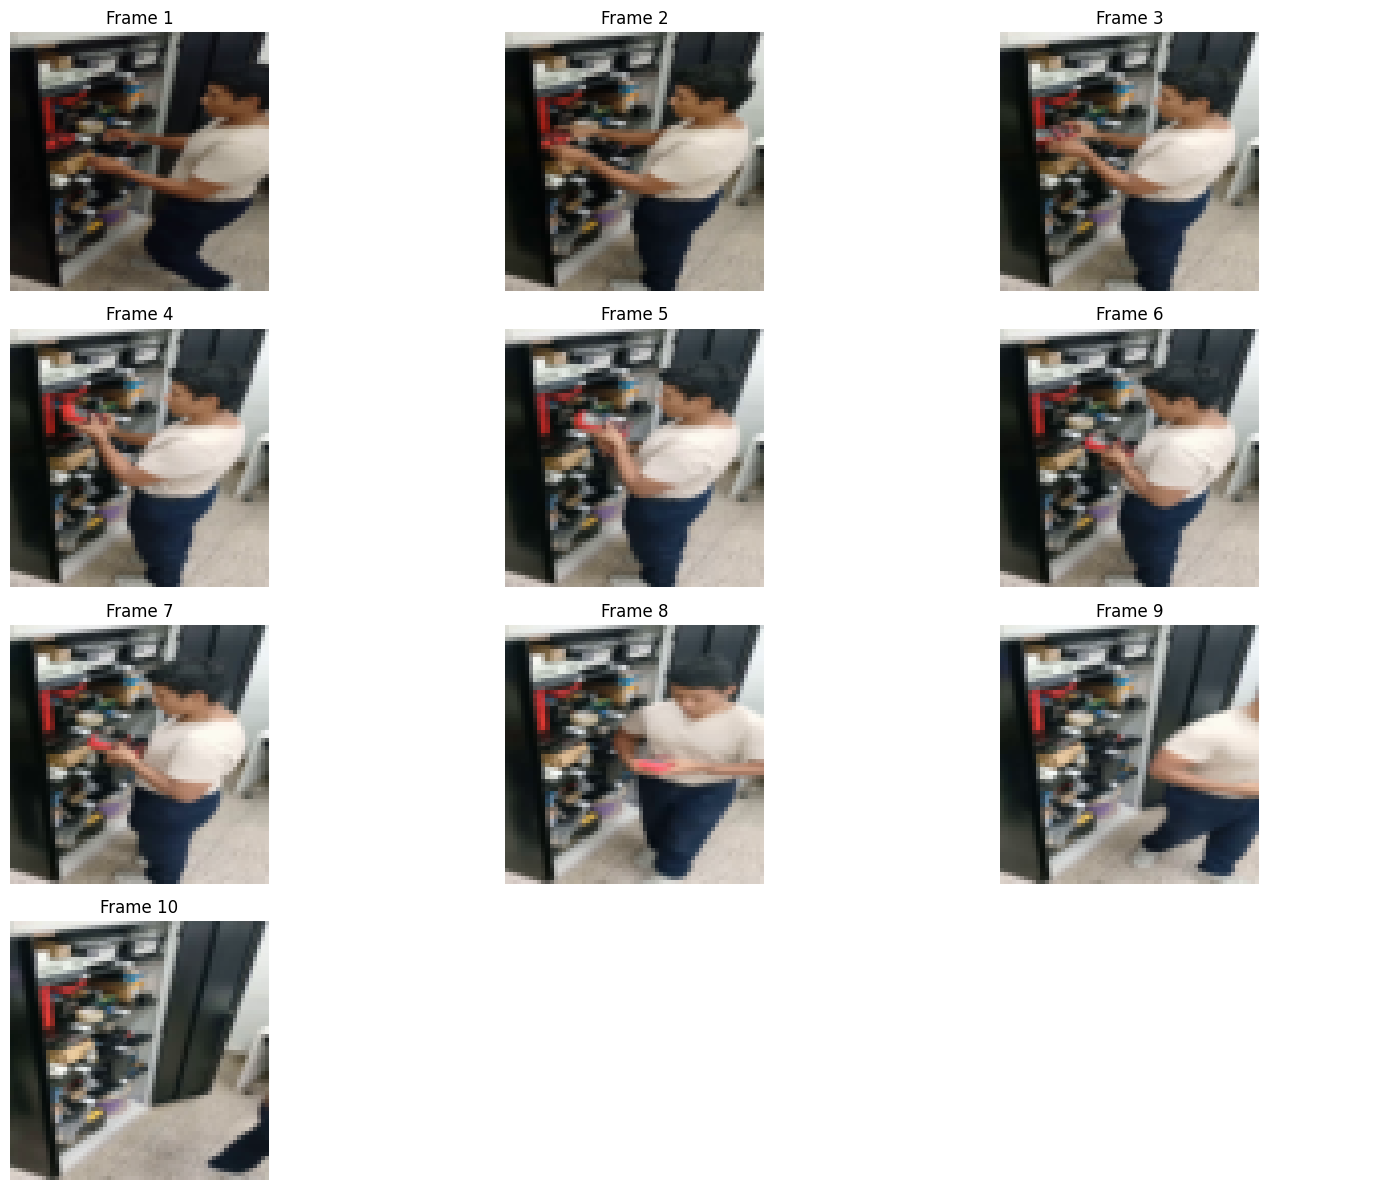

In [11]:
num_cols=3
#n_frames=frames_cropped.shape[0]
n_frames=frames.shape[0]
num_rows=(n_frames+num_cols-1)//num_cols

fig,axes=plt.subplots(num_rows,num_cols,figsize=(15,num_rows*3))

for i, ax in enumerate(axes.flat):
    if i < n_frames:
        # Convertir el frame de BGR a RGB para que se muestre correctamente con matplotlib
        frame = cv2.cvtColor(frames[i].permute(1, 2, 0).numpy(), cv2.COLOR_BGR2RGB)
        #frame = cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB)
        #frame=result[i].permute(1, 2, 0)

        print(f"Dimensions of the frame: {frame.shape}")

        ax.imshow(frame)
        #ax.imshow(result[i].permute(1,2,0))
        ax.set_title(f"Frame {i + 1}")
        ax.axis('off')  # Ocultar los ejes
    else:
        ax.axis('off')  # Ocultar ejes de subplots vacíos

plt.tight_layout()  # Ajustar el diseño
plt.show()

In [69]:
# num_cols=3
# n_frames=len(frames)
# num_rows=(n_frames+num_cols-1)//num_cols

# fig,axes=plt.subplots(num_rows,num_cols,figsize=(15,num_rows*3))

# for i, ax in enumerate(axes.flat):
#     if i < n_frames:
#         # Convertir el frame de BGR a RGB para que se muestre correctamente con matplotlib
#         frame = cv2.cvtColor(frames[i].permute(1, 2, 0).numpy(), cv2.COLOR_BGR2RGB)
#         #frame = cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB)
#         #frame=result[i].permute(1, 2, 0)
#         ax.imshow(frame)
#         #ax.imshow(result[i].permute(1,2,0))
#         ax.set_title(f"Frame {i + 1}")
#         ax.axis('off')  # Ocultar los ejes
#     else:
#         ax.axis('off')  # Ocultar ejes de subplots vacíos

# plt.tight_layout()  # Ajustar el diseño
# plt.show()

## Data augmentation prueba

In [65]:
frame_prueba=frames[9]

In [66]:
saturation=[1,0.2,0.6]
hue=[0,-0.1,0.1]
brightness=[1,0.5]
contrast=[1,0.5]

In [67]:
num_cols=6
num_rows=6

transformation_list=[]

transformation_setting=[]

for i_saturation in saturation:
    for i_hue in hue:
        for i_brightness in brightness:
            for i_contrast in contrast:
                transform_videos_prueba=transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((108,192)), #256,480   #216,384   #180,320     #135,240
                    v2.ColorJitter(brightness=(i_brightness,i_brightness),
                                contrast=(i_contrast,i_contrast),
                                saturation=(i_saturation,i_saturation),
                                hue=(i_hue,i_hue)),
                    transforms.ToTensor()
                ])
                transformation_list.append(transform_videos_prueba)
                transformation_setting.append({
                    'saturation':i_saturation,
                    'hue':i_hue,
                    'brightness':i_brightness,
                    'contrast':i_contrast
                })

In [68]:
len(transformation_list)

36

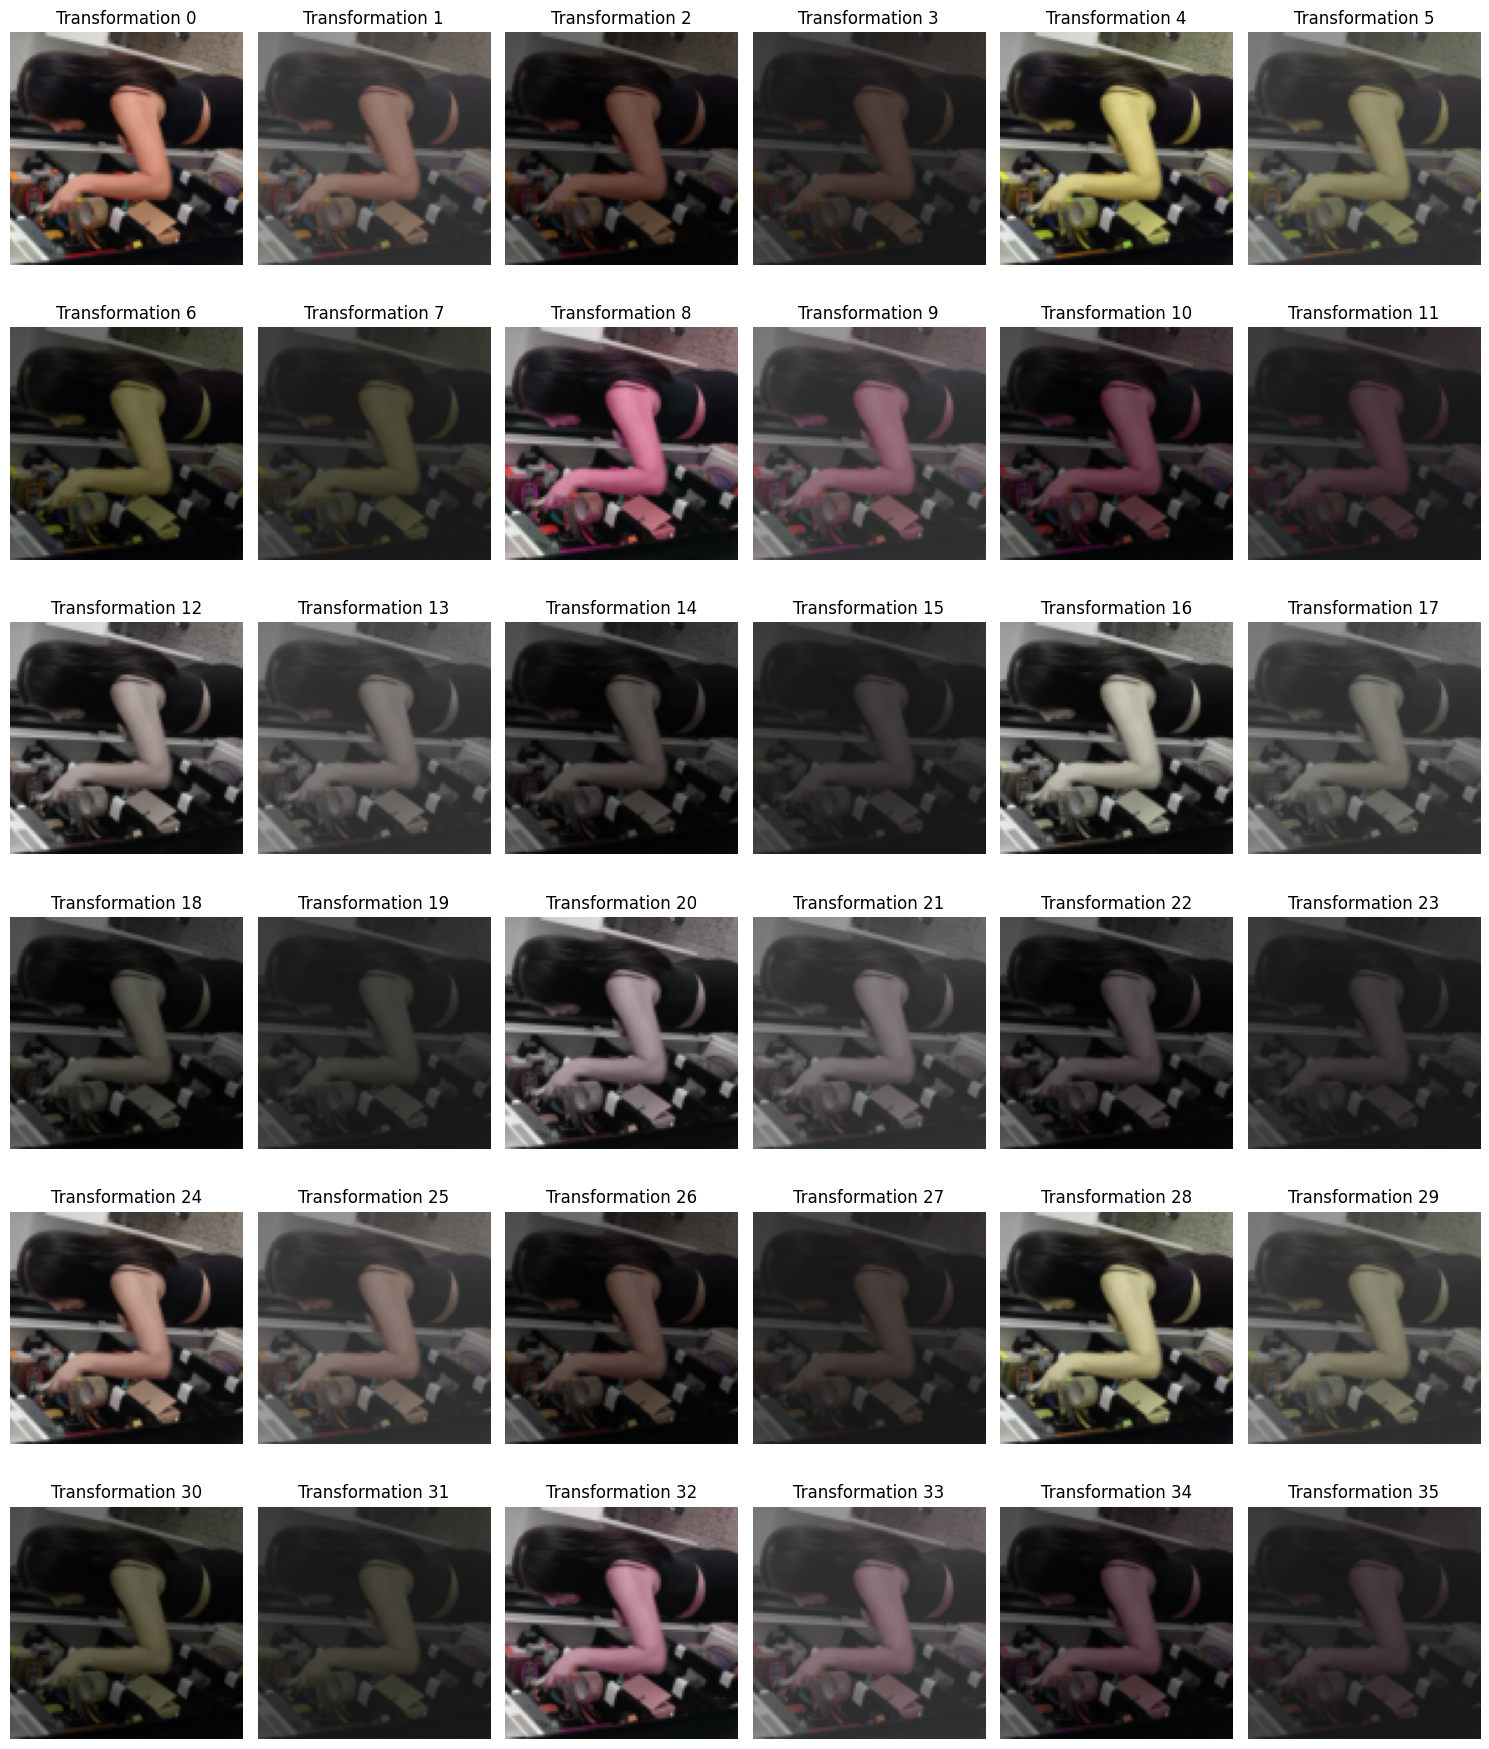

In [69]:
fig,axes=plt.subplots(num_rows,num_cols,figsize=(15,num_rows*3))

transformation_crop=RandomCropVideo(size=(100,100))

for i, ax in enumerate(axes.flat):

    frame_transformed=transformation_list[i](frame_prueba)

    frame_transformed=transformation_crop(frame_transformed.unsqueeze(dim=0))

    RandomCropVideo(size=(100,100))

    frame = cv2.cvtColor(frame_transformed.squeeze(dim=0).permute(1, 2, 0).numpy(), cv2.COLOR_BGR2RGB)
    ax.imshow(frame)
    #ax.imshow(result[i].permute(1,2,0))
    ax.set_title(f"Transformation {i}")
    ax.axis('off')  # Ocultar los ejes


plt.tight_layout()  # Ajustar el diseño
plt.show()

In [77]:
transformation_setting[29]

{'saturation': 0.6, 'hue': -0.1, 'brightness': 1, 'contrast': 0.5}

## Data augmentation

### Setting the data augmentation settings

In [4]:
data_augmentation_settings=[(1,0,1,1),
                        (1,0,1,0.5),
                        (1,-0.1,1,1),
                        (0.2,-0.1,1,1),
                        (0.2,0,1,0.5),
                        (0.6,-0.1,1,0.5)]

transformation_list=[]

for settings in data_augmentation_settings:
        transform_videos_prueba=transforms.Compose([transforms.ToPILImage(),
                                                transforms.Resize((64,64)), #256,480   #216,384   #180,320     #135,240
                                                v2.ColorJitter(saturation=(settings[0],settings[0]),
                                                        hue=(settings[1],settings[1]),
                                                        brightness=(settings[2],settings[2]),
                                                        contrast=(settings[3],settings[3])),
                                                transforms.ToTensor()
                                        ])
        transformation_list.append(transform_videos_prueba)


In [5]:
videos_path=os.path.join(root,"oficial_db")
destiny_path=os.path.join(root,"oficial_db_data_augmentation")
activities=os.listdir(videos_path)

for activity in activities:

    # if activity  == "actividad_normal":

    activity_path=os.path.join(videos_path,activity)
    destinity_activity_path=os.path.join(destiny_path,activity)

    people=os.listdir(activity_path)
    for person in people:
        
        person_path=os.path.join(activity_path,person)
        destinity_person_path=os.path.join(destinity_activity_path,person)
        os.makedirs(destinity_person_path,exist_ok=True)

        videos=os.listdir(person_path)
        for video in videos:
            video_path=os.path.join(person_path,video)

            sub_carpet=video.split(".")[0]
            sub_carpet_path=os.path.join(destinity_person_path,sub_carpet)
            os.makedirs(sub_carpet_path,exist_ok=True)

            k=1

            for transformation in transformation_list:
                transformation_carpet_path=os.path.join(sub_carpet_path,f"transformation_{k}")
                os.makedirs(transformation_carpet_path,exist_ok=True)

                k+=1

                frames=get_frames(video_path=video_path,n_frames=10,transform=transformation)
                # print(frames.shape)
                # crop_instance=RandomCropVideo(size=(128,128))
                # frames_cropped=crop_instance(frames)

                n=1
                for frame in frames:
                    frame_up = (frame.permute(1, 2, 0).numpy()*255).astype('uint8')
                    cv2.imwrite(f"{transformation_carpet_path}/frame_{n}.jpg",frame_up)
                    n+=1


## Cutting videos of 5 seconds

In [4]:
import os
#from moviepy.video.io.VideoFileClip import VideoFileClip

from moviepy import VideoFileClip


def dividir_video(video_path,duration_per_video,route_folder):
    video=VideoFileClip(video_path)
    duration_total=video.duration

    num_videos=int(duration_total//duration_per_video) + 1

    for i in range(num_videos):
        start = i * duration_per_video
        end=min((i+1)*duration_per_video,duration_total)
        nuevo_clip=video.subclipped(start,end)
        nuevo_clip.write_videofile(os.path.join(route_folder,f"videos_{i+1}.mp4"),codec="libx264",audio_codec="aac")
    video.close()

In [6]:
videos_to_cropped_path=os.path.join(root,"raw_videos")

for video in os.listdir(videos_to_cropped_path):
    video_path=os.path.join(videos_to_cropped_path,video)
    folder_name=video.split(".")[0]
    folder_path=os.path.join(root,"videos_recortados",folder_name)
    os.makedirs(folder_path,exist_ok=True)
    dividir_video(video_path=video_path,duration_per_video=5,route_folder=folder_path)

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'qt', 'minor_version': '512', 'compatible_brands': 'qt', 'creation_time': '2025-05-12T17:28:48.000000Z', 'encoder': 'Blackmagic Design DaVinci Resolve'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 7559, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(Main)', 'metadata': {'Metadata': '', 'creation_time': '2025-05-12T17:28:48.000000Z', 'handler_name': 'VideoHandler', 'vendor_id': '', 'encoder': 'H.264', 'timecode': '01:00:00:00'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 320, 'metadata': {'Metadata': '', 'creation_time': '2025-05-12T17:28:48.000000Z', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 2, 'stream_type': 'data', 'language': 'eng', 'default': True, 'metadata': {'

MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_1.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_1.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_2.mp4.
MoviePy - Writing audio in videos_2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_2.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_2.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_3.mp4.
MoviePy - Writing audio in videos_3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_3.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_3.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_4.mp4.
MoviePy - Writing audio in videos_4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_4.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_4.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_5.mp4.
MoviePy - Writing audio in videos_5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_5.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_5.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_6.mp4.
MoviePy - Writing audio in videos_6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_6.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_6.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_7.mp4.
MoviePy - Writing audio in videos_7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_7.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_7.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_8.mp4.
MoviePy - Writing audio in videos_8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_8.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_8.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_9.mp4.
MoviePy - Writing audio in videos_9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_9.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_9.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_10.mp4.
MoviePy - Writing audio in videos_10TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_10.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_10.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_11.mp4.
MoviePy - Writing audio in videos_11TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_11.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_11.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_12.mp4.
MoviePy - Writing audio in videos_12TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_12.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_12.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_13.mp4.
MoviePy - Writing audio in videos_13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_13.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_13.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_14.mp4.
MoviePy - Writing audio in videos_14TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_14.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_14.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_15.mp4.
MoviePy - Writing audio in videos_15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_15.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_15.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_16.mp4.
MoviePy - Writing audio in videos_16TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_16.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_16.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_17.mp4.
MoviePy - Writing audio in videos_17TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_17.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_17.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_18.mp4.
MoviePy - Writing audio in videos_18TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_18.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_18.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_19.mp4.
MoviePy - Writing audio in videos_19TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_19.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_19.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_20.mp4.
MoviePy - Writing audio in videos_20TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_20.mp4



c:\Proyectos\PAPER\venv\lib\site-packages\moviepy\video\io\ffmpeg_reader.py:178: UserWarning: In file c:\Proyectos\PAPER\raw_videos\videos_vit_alvaro_actividad_normal.mov, 6220800 bytes wanted but 0 bytes read at frame index 3000 (out of a total 3000 frames), at time 100.00/100.01 sec. Using the last valid frame instead.
  warnings.warn(


MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_20.mp4
MoviePy - Building video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_21.mp4.
MoviePy - Writing audio in videos_21TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_21.mp4



MoviePy - Done !
MoviePy - video ready c:\Proyectos\PAPER\videos_recortados\videos_vit_alvaro_actividad_normal\videos_21.mp4


## Split the data

In [7]:
db_path=os.path.join(root,"oficial_db_data_augmentation")
destination_path=os.path.join(root,"oficial_set")
activities=os.listdir(db_path)

for activity in activities:
    activity_path=os.path.join(db_path,activity)
    people=os.listdir(activity_path)
    for person in people:
        person_path=os.path.join(activity_path,person)
        videos=os.listdir(person_path)
        for video in videos:
            video_path=os.path.join(person_path,video)
            videos_transformation=os.listdir(video_path)
            train_videos,test_videos=train_test_split(videos_transformation,test_size=0.2)
            
            destination_train_path=os.path.join(destination_path,"train")
            os.makedirs(destination_train_path,exist_ok=True)

            destination_test_path=os.path.join(destination_path,"test")
            os.makedirs(destination_test_path,exist_ok=True)

            for vid in train_videos:
                destination_activity_path=os.path.join(destination_train_path,activity)
                os.makedirs(destination_activity_path,exist_ok=True)

                uuid4=uuid.uuid4()
                id=str(uuid4)

                transformation_path=os.path.join(video_path,vid)
                destination_transformation_path=os.path.join(destination_activity_path,f"{vid}_{person}_{id}")
                shutil.copytree(src=transformation_path,dst=destination_transformation_path)

            for vid in test_videos:
                destination_activity_path=os.path.join(destination_test_path,activity)
                os.makedirs(destination_activity_path,exist_ok=True)

                uuid4=uuid.uuid4()
                id=str(uuid4)

                transformation_path=os.path.join(video_path,vid)
                destination_transformation_path=os.path.join(destination_activity_path,f"{vid}_{person}_{id}")
                shutil.copytree(src=transformation_path,dst=destination_transformation_path)

